**RED WINE QUALITY PREDICTION DATA MINING PROJECT**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats

# warning library
import warnings
warnings.filterwarnings("ignore")

**I. LOAD AND CHECK DATA**

In [5]:
data = pd.read_csv("/Users/nguyenthaohau/Desktop/wine_quality.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


--> Insight 1: No missing values and ALL the prediction variables are NUMERICIAL 

**II. Exploratory Data Analysis (EDA)**

We will discover 3 groups of characteristics of red wine 
- Acids: fixed acidity, volatile acidity, citric acid, pH 
- Flavors: residual sugar, chlorides, density, alcohol
- Preservatives: sulphates, free sulfure dioxide, total sulfure dioxide

1. Acids 

1.1. Fixed Acidity 

<AxesSubplot:ylabel='Density'>

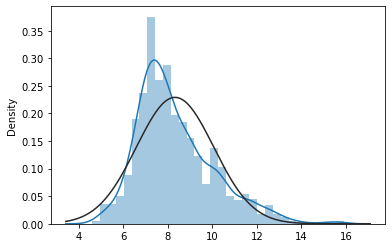

In [ ]:
sns.distplot(x=data['fixed acidity'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

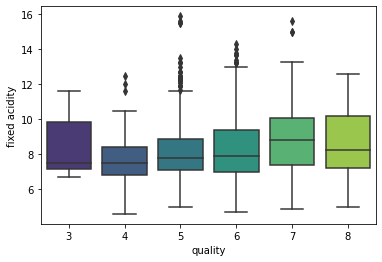

In [ ]:
sns.boxplot(x="quality", y="fixed acidity", palette='viridis', data=data)


--> We see that the distributions of fixed acidity between the different quality categories have a significant overlap, and so fixed acidity would not be a good predictor of quality. However, we can see that high-quality wines have somewhat higher fixed acidity levels. In a high quality wine the fixed acidic levels higher than 8g/L but less than 13g/L.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['fixed acidity'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.12405164911322429  with a P-value of P = 6.495635009282964e-07


1.2. Volatile Acidity 

<AxesSubplot:ylabel='Density'>

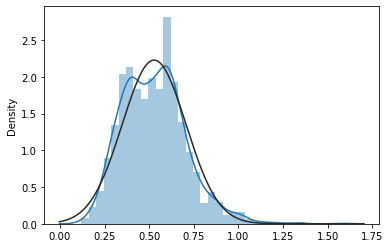

In [ ]:
sns.distplot(x=data['volatile acidity'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

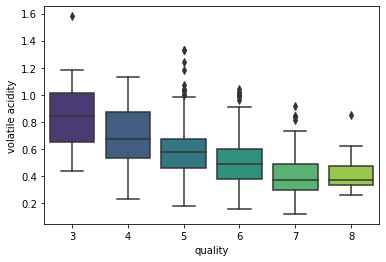

In [ ]:
sns.boxplot(x="quality", y="volatile acidity", palette='viridis', data=data)

--> It is clear from the analysis that extreme volatile acidity levels can be pursued as a characteristic that affects the quality of the wine. A high quality wine has VA level at an average between 0.3-0.5g/L.

Definition: Volatile acidity (VA) is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar. Therefore, this can be referred to as an unpleasant characteristic of wine. 

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['volatile acidity'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.39055778026400717  with a P-value of P = 2.0517148070151443e-59


1.3. Citric Acid

<AxesSubplot:ylabel='Density'>

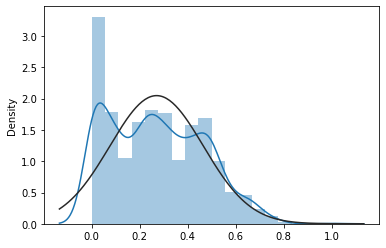

In [ ]:
sns.distplot(x=data['citric acid'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

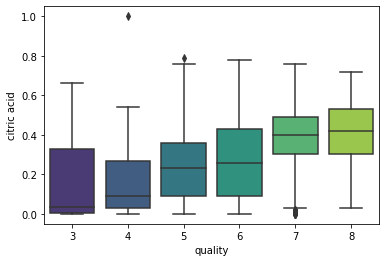

In [ ]:
sns.boxplot(x="quality", y="citric acid", palette='viridis', data=data)

--> Adding citric acid will give the wine “freshness”. Therefore, In a high quality wine bottle the citric acid level would be at an average level between 0.3-0.6 g/L.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['citric acid'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2263725143180414  with a P-value of P = 4.9912952505121016e-20


1.4. pH level 

<AxesSubplot:ylabel='Density'>

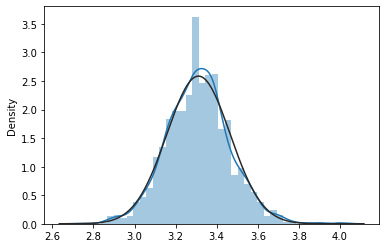

In [ ]:
sns.distplot(x=data['pH'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='pH'>

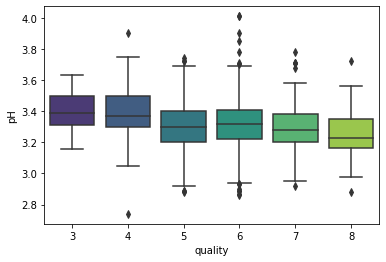

In [ ]:
sns.boxplot(x="quality", y="pH", palette='viridis', data=data)

a pH value of 3.20-3.30 would be ideal for high quality wine. This will in turn allow the wine to have a crisper and tart taste than a low acidic wine which has a smoother rounder feeling.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['pH'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.05773139120538215  with a P-value of P = 0.020962778651490887


2. Flavors 

2.1. Residual Sugar 

<AxesSubplot:ylabel='Density'>

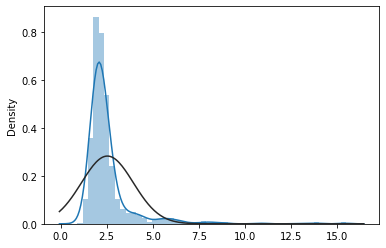

In [ ]:
sns.distplot(x=data['residual sugar'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

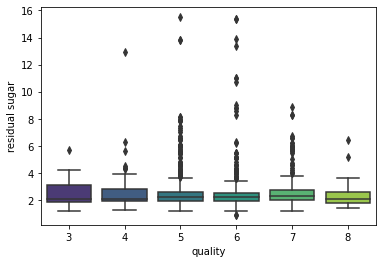

In [ ]:
sns.boxplot(x="quality", y="residual sugar", palette='viridis', data=data)

We can see that very low-quality wines have a high amount of residual sugar. Even though residual sugars do not have a drastic effect on the quality of wine it is better to have a level below 2.5g/L

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['residual sugar'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.013731637340066292  with a P-value of P = 0.5832180131585295


2.2. Chlorides 

<AxesSubplot:ylabel='Density'>

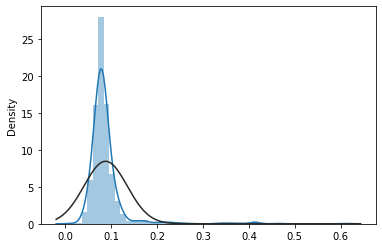

In [ ]:
sns.distplot(x=data['chlorides'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

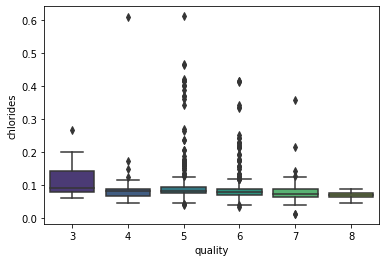

In [ ]:
sns.boxplot(x="quality", y="chlorides", palette='viridis', data=data)

Chlorides are the amount of salt in the wine. They are used to help adjust acidity and taste. The study shows that chlorides and quality appear to have a negative relationship with red wine. This means high-quality wine contains less salt. Taking this fact from the analysis into consideration we can say that the chloride level between 75 mg/L to 80 mg/L is good for high quality wine.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['chlorides'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.12890655993005265  with a P-value of P = 2.3133826540604773e-07


2.3. Density 

<AxesSubplot:ylabel='Density'>

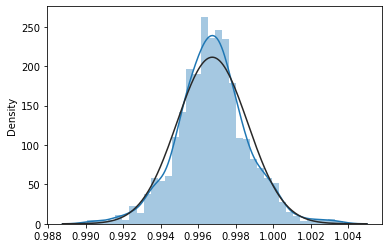

In [ ]:
sns.distplot(x=data['density'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='density'>

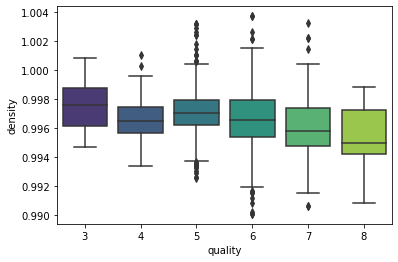

In [ ]:
sns.boxplot(x="quality", y="density", palette='viridis', data=data)

The density of the wine is inversely proportional to the quality. The primary reason can be stated as the addition of sugar, alcohol, and other ingredients to enhance the quality of the wine. These supplementary ingredients can cause the density of the liquid to drop. Therefore, taking the above finding into consideration the mean density of the wine at around 0.996 g/cc will ensure a highquality product.


In [ ]:
pearson_coef, p_value = stats.pearsonr(data['density'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.17491922778334873  with a P-value of P = 1.8749566520116645e-12


2.4. Alcohol

<AxesSubplot:ylabel='Density'>

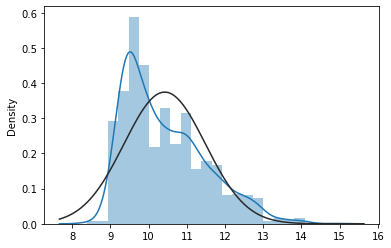

In [ ]:
sns.distplot(x=data['alcohol'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

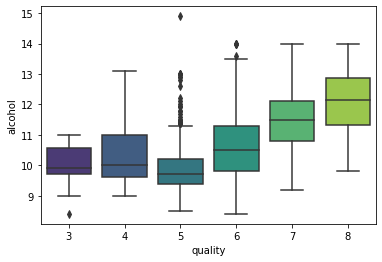

In [ ]:
sns.boxplot(x="quality", y="alcohol", palette='viridis', data=data)

A wine with a higher alcohol content will have a fuller, richer body, while a lower-level alcohol wine will taste lighter and more delicate on the palate.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['alcohol'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.47616632400113607  with a P-value of P = 2.831476974778582e-91


3. Preservatives 

3.1. Sulphates 

<AxesSubplot:ylabel='Density'>

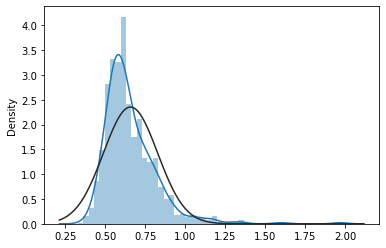

In [ ]:
sns.distplot(x=data['sulphates'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

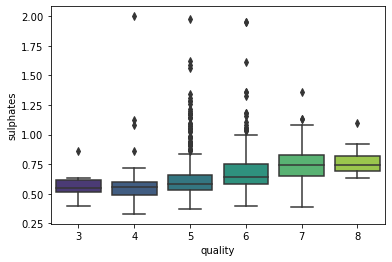

In [ ]:
sns.boxplot(x="quality", y="sulphates", palette='viridis', data=data)

Definition: Sulfites are a group of chemical compounds found naturally in a variety of foods and beverages. They are artificially added as a preservative. Winemakers often use sulfites to help to minimize oxidation in wine and maintain its freshness. This in turn improves its taste and appearance.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['sulphates'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.25139707906926123  with a P-value of P = 1.8020884534539657e-24


3.2. Free Sulfur Dioxide 

<AxesSubplot:ylabel='Density'>

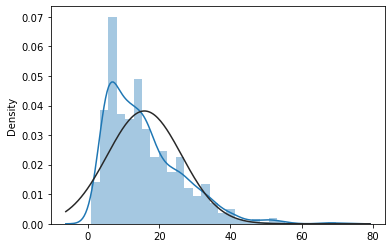

In [ ]:
sns.distplot(x=data['free sulfur dioxide'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

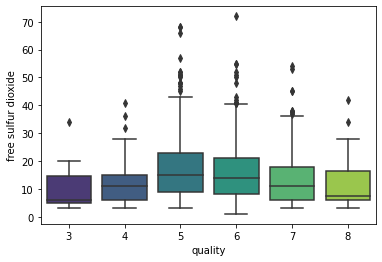

In [ ]:
sns.boxplot(x="quality", y="free sulfur dioxide", palette='viridis', data=data)

In winemaking, sulfur dioxide is added to control the process and serves many useful functions. For example, it acts as an enzyme inhibitor in musts to prevent the juice from browning. As a microbiological control agent, sulfur dioxide is added to the winemaking process to prevent oxidation in the finished product.

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['free sulfur dioxide'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.050656057244276395  with a P-value of P = 0.042833979508175565


3.3. Total Sulfure Dioxide 

<AxesSubplot:ylabel='Density'>

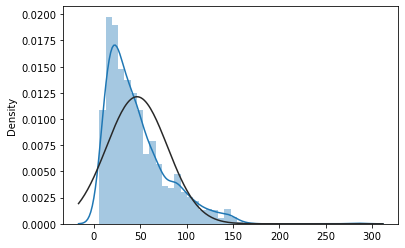

In [ ]:
sns.distplot(x=data['total sulfur dioxide'], fit=norm)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

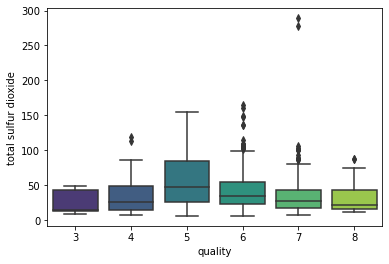

In [ ]:
sns.boxplot(x="quality", y="total sulfur dioxide", palette='viridis', data=data)

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['total sulfur dioxide'], data['quality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.18510028892653785  with a P-value of P = 8.62170342366267e-14


**CORRELATIONS**

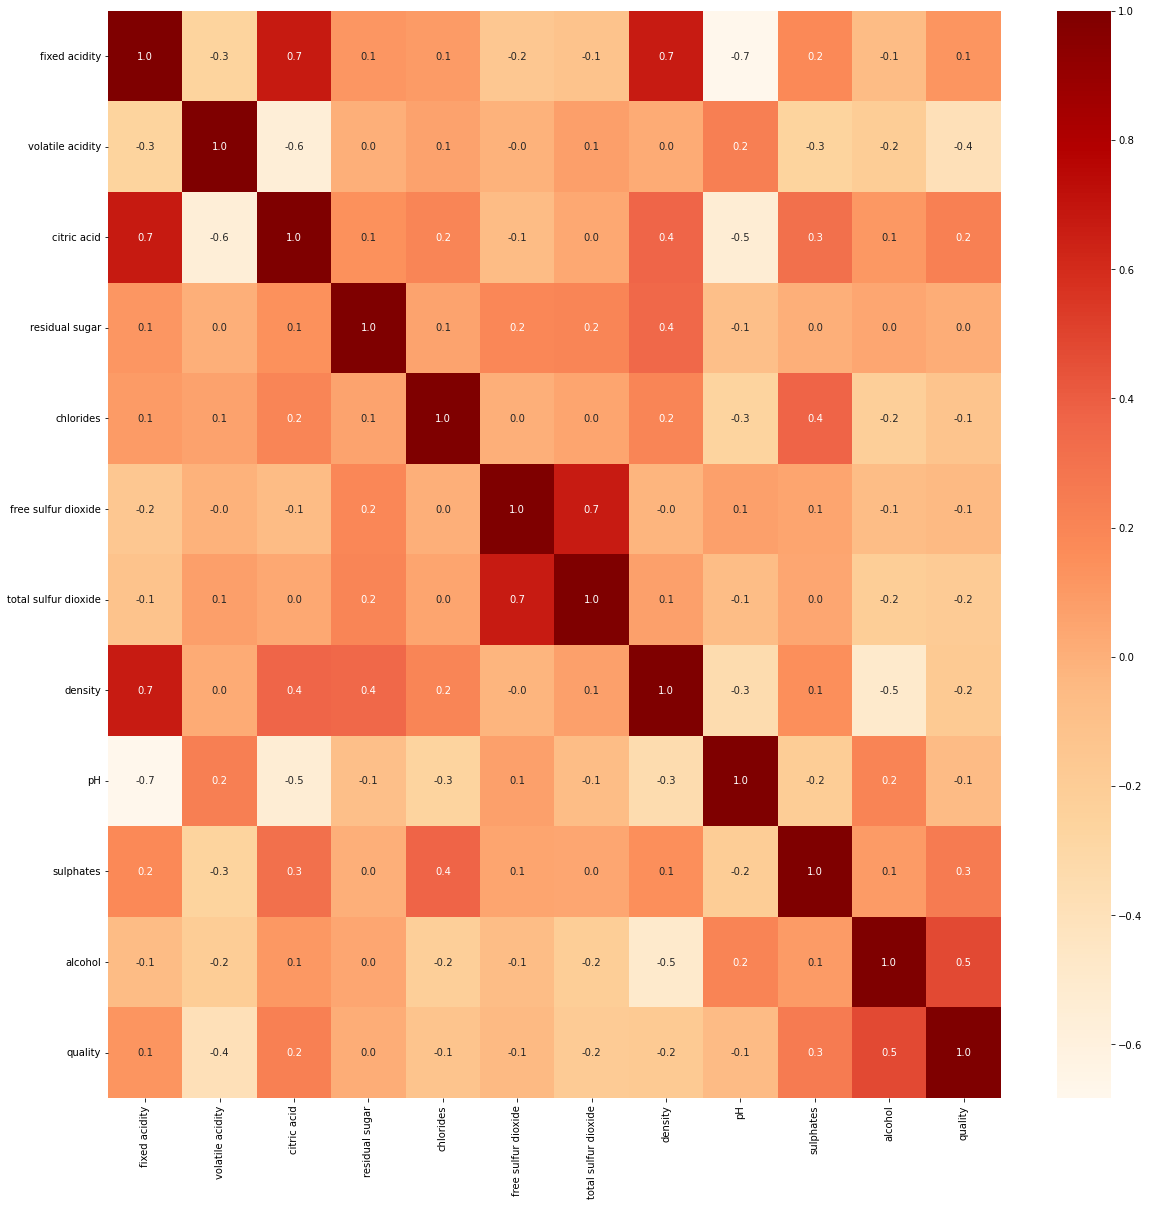

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='OrRd')
plt.savefig('Correlation Heat map')

**EDA INSIGHT CONCLUSIONS**

#QUESTION 1: What are the TOP 5 major factors that influence the wine quality? 

a. For the acids group: 
- Volatile Acid: strong negative correlation with quality (pearson cor = -0.39)
- Citric Acid: moderate postive correlation with quality (pearson cor = 0.23)

b. For the flavors group:
- Alcohol: strong positive correlation with quality (pearson cor = 0.48)
- Density: weak negative correlation with quality, yet still consider important for the prediction (pearson cor = -0.18)

c. For the preservatives group: 
- sulphates: moderate postive correlation with quality (pearson cor = 0.25)


#QUESTION 2: Are there any multicolinearity detected? 

- pH, fixed acidity, citric acid: This is because features such as fixed acid, citric acids are part of features like pH value. (Smaller pH indicates acidity)

In [ ]:
data[['pH', 'fixed acidity', 'citric acid']].corr()

,pH,fixed acidity,citric acid
pH,1.000000,-0.682978,-0.541904
fixed acidity,-0.682978,1.000000,0.671703
citric acid,-0.541904,0.671703,1.000000


- total sulfure dioxide and free sufure dioxide: This is because these two chemicals contain the same root of SO2 

In [ ]:
data[['total sulfur dioxide', 'free sulfur dioxide']].corr()

,total sulfur dioxide,free sulfur dioxide
total sulfur dioxide,1.000000,0.667666
free sulfur dioxide,0.667666,1.000000


#QUESTION 3: What about outliers and skewness? 

- Most features are right-skewed --> fix by boxcox
- The dataset has been affected by outliers --> fix by dropping the outliers 

**III. Data Preparation**

3.1. Dealing with skewness 

In [ ]:
data["fixed acidity"], lam_fixed_acidity = boxcox(data["fixed acidity"])

Text(0.5, 1.0, 'fixed acidity Distplot')

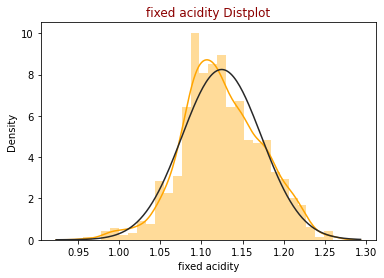

In [ ]:
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")

In [ ]:
data["residual sugar"], lam_fixed_acidity = boxcox(data["residual sugar"])
data["chlorides"], lam_fixed_acidity = boxcox(data["chlorides"])
data["free sulfur dioxide"], lam_fixed_acidity = boxcox(data["free sulfur dioxide"])
data["total sulfur dioxide"], lam_fixed_acidity = boxcox(data["total sulfur dioxide"])
data["sulphates"], lam_fixed_acidity = boxcox(data["sulphates"])
data["alcohol"], lam_fixed_acidity = boxcox(data["alcohol"])

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1.124656,0.527821,0.270976,0.513556,-4.763474,3.129049,3.965719,0.996747,3.311113,-0.609663,0.300524,5.636023
std,0.048393,0.179060,0.194801,0.110080,0.962770,0.985817,0.846175,0.001887,0.154386,0.340693,0.000039,0.807569
min,0.956497,0.120000,0.000000,-0.112192,-14.348451,0.000000,1.875723,0.990070,2.740000,-2.114887,0.300402,3.000000
25%,1.092298,0.390000,0.090000,0.450049,-5.192858,2.248371,3.346596,0.995600,3.210000,-0.835081,0.300488,5.000000
50%,1.120087,0.520000,0.260000,0.513157,-4.795645,3.215430,3.994882,0.996750,3.310000,-0.622818,0.300523,6.000000
75%,1.156455,0.640000,0.420000,0.572939,-4.391441,3.827881,4.591023,0.997835,3.400000,-0.373689,0.300556,6.000000
max,1.260365,1.580000,1.000000,0.813867,-0.552596,5.926269,6.564923,1.003690,4.010000,0.490605,0.300618,8.000000


3.2. Dealing with outliers 

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [ ]:
print("number of outliers detected --> ",len(data.loc[detect_outliers(data,data.columns[:-1])]))
data.loc[detect_outliers(data,data.columns[:-1])]

number of outliers detected -->  51


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,-6.123025,2.427186,4.649352,0.99340,3.90,-0.801405,0.300598,4
94,0.985731,1.020,0.04,0.277689,-6.845807,4.920668,4.983161,0.99380,3.75,-1.111447,0.300535,4
95,0.964194,0.600,0.17,0.530233,-5.855781,3.504207,5.261323,0.99320,3.85,-0.678257,0.300595,6
442,1.257350,0.685,0.76,0.666360,-4.081922,2.046206,4.144017,1.00320,2.95,-0.476630,0.300559,7
553,0.985731,1.040,0.24,0.360736,-6.420787,4.503448,5.136097,0.99340,3.74,-0.622818,0.300567,5
554,1.256323,0.645,0.49,0.691490,-4.230744,2.733844,3.398654,1.00315,2.92,-0.354821,0.300556,5
555,1.256323,0.645,0.49,0.691490,-4.230744,2.733844,3.398654,1.00315,2.92,-0.354821,0.300556,5
557,1.257350,0.645,0.49,0.691490,-4.230744,2.733844,3.398654,1.00315,2.92,-0.354821,0.300556,5
588,0.985731,0.420,0.24,0.473382,-5.732018,3.673341,4.327250,0.99170,3.72,-0.354821,0.300610,8
652,1.260365,0.360,0.65,0.768664,-4.200078,3.900481,4.758716,0.99760,2.98,-0.191541,0.300618,5


In [ ]:
data = data.drop(detect_outliers(data,data.columns[:-1]),axis = 0).reset_index(drop = True)

In [ ]:
data.shape

(1548, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,1.125970,0.526428,0.271156,0.514197,-4.743316,3.110475,3.945206,0.996792,3.309638,-0.612929,0.300523,5.631137
std,0.045693,0.175659,0.192923,0.103680,0.836474,0.979361,0.838648,0.001725,0.143485,0.334529,0.000038,0.794445
min,0.998929,0.120000,0.000000,0.164038,-7.572154,0.000000,1.875723,0.991200,2.860000,-2.114887,0.300402,3.000000
25%,1.092298,0.390000,0.100000,0.450049,-5.145129,2.248371,3.346596,0.995660,3.210000,-0.835081,0.300488,5.000000
50%,1.120087,0.520000,0.260000,0.513157,-4.795645,3.107333,3.962831,0.996800,3.310000,-0.622818,0.300519,6.000000
75%,1.156455,0.636250,0.420000,0.572939,-4.391441,3.827881,4.550629,0.997833,3.400000,-0.393099,0.300553,6.000000
max,1.251019,1.330000,0.790000,0.809291,-0.552596,5.926269,5.828287,1.002890,3.780000,0.485766,0.300610,8.000000


**IV. Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import collections
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

--Label Binarization--

In [ ]:
# separate the data and Label
X = data.drop('quality',axis=1)
#label binarization 
Y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
Y.value_counts()

0    1345
1     203
Name: quality, dtype: int64

--> imbalanced data detetected, will fix this using oversampling of SMOTE 

-- Train-Test Split and Oversampling --

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [ ]:
print("Before smote --> ", collections.Counter(Y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({0: 1077, 1: 161})
After smote -->  Counter({0: 1077, 1: 1077})


In [ ]:
#Standardized data 
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [ ]:
results = []

**4.1. KNN**

KNeighborsClassifier Acc :  0.7967741935483871


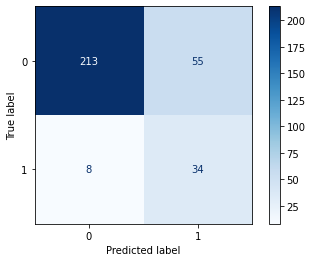

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc1 = accuracy_score(Y_test, y_pred)
results.append(acc1)
print("KNeighborsClassifier Acc : ", acc1)

plot_confusion_matrix(knn, X_test, Y_test, cmap= 'Blues')  
plt.show()

In [ ]:
print(" \t \t  KNN Classification Report")
print(classification_report(Y_test, y_pred))

 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       268
           1       0.38      0.81      0.52        42

    accuracy                           0.80       310
   macro avg       0.67      0.80      0.70       310
weighted avg       0.88      0.80      0.82       310



**4.2. SVC**

SVC Acc :  0.867741935483871


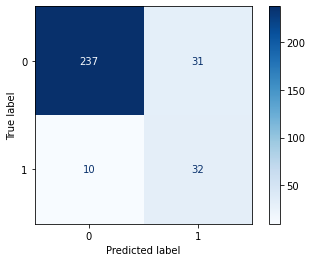

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(Y_test, pred_svc)
acc2 = accuracy_score(Y_test, pred_svc)
results.append(acc2)

print("SVC Acc : ", acc2)

plot_confusion_matrix(svc, X_test, Y_test, cmap= "Blues")  
plt.show()

In [ ]:
print(" \t \t  SVC Classification Report")
print(classification_report(Y_test, pred_svc))

 	 	  SVC Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.51      0.76      0.61        42

    accuracy                           0.87       310
   macro avg       0.73      0.82      0.76       310
weighted avg       0.90      0.87      0.88       310



**4.3. Logistics Regression**

Logistics Regression Acc :  0.7935483870967742


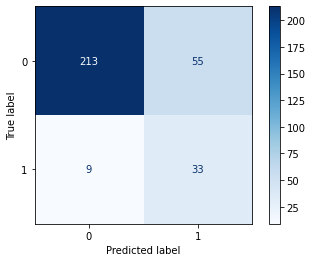

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train_sm)
log_pred = logreg.predict(X_test)
cm = confusion_matrix(Y_test, log_pred)

acc3 = accuracy_score(Y_test, log_pred)
results.append(acc3)
print("Logistics Regression Acc : ", acc3)

plot_confusion_matrix(logreg, X_test, Y_test, cmap= "Blues")  
plt.show()

In [ ]:
print(" \t \t  Logistics Regression Report")
print(classification_report(Y_test, log_pred))

 	 	  Logistics Regression Report
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       268
           1       0.38      0.79      0.51        42

    accuracy                           0.79       310
   macro avg       0.67      0.79      0.69       310
weighted avg       0.88      0.79      0.82       310



**4.4. Random Forest Classification**

RandomForestClassifier Acc :  0.9


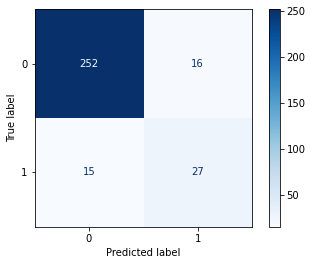

In [ ]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc4 = accuracy_score(Y_test, y_pred_rf)
results.append(acc4)

print("RandomForestClassifier Acc : ", acc4)

plot_confusion_matrix(rf, X_test, Y_test, cmap= "Blues")  
plt.show()

In [ ]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       268
           1       0.63      0.64      0.64        42

    accuracy                           0.90       310
   macro avg       0.79      0.79      0.79       310
weighted avg       0.90      0.90      0.90       310



**RESULT TABLE**

In [ ]:
df_result = pd.DataFrame({"Score":results, "ML Models":["KNN","SVC","LogisticsRegression","RandomForestClassifier"]})

In [ ]:
df_result.style.background_gradient("Blues")

,Score,ML Models
0,0.796774,KNN
1,0.867742,SVC
2,0.793548,LogisticsRegression
3,0.900000,RandomForestClassifier


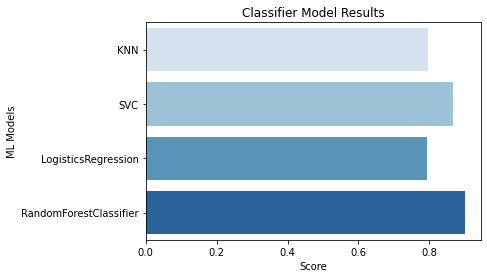

In [ ]:
g = sns.barplot("Score", "ML Models", data = df_result, palette='Blues')
g.set_xlabel("Score")
g.set_title("Classifier Model Results", color = "Black")
plt.show()